In [1]:
from glob import glob
import os

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
m = 1
diff1 = datetime.datetime.today() - datetime.timedelta(hours=5) - datetime.timedelta(days=m-1)
now1 = diff1.strftime("%d_%m_%Y_%H_%M_%S")
diff2 = datetime.datetime.today() - datetime.timedelta(hours=5) - datetime.timedelta(days=m)
now2 = diff2.strftime("%d_%m_%Y_%H_%M_%S")
now1, now2

('15_12_2021_18_26_15', '14_12_2021_18_26_15')

In [123]:
csvs = [i for i in glob("Xs/round2/*") if "_" not in i]
print(csvs)

['Xs/round2\\ada.csv', 'Xs/round2\\bch.csv', 'Xs/round2\\btc.csv', 'Xs/round2\\doge.csv', 'Xs/round2\\dot.csv', 'Xs/round2\\eos.csv', 'Xs/round2\\etc.csv', 'Xs/round2\\eth.csv', 'Xs/round2\\link.csv', 'Xs/round2\\ltc.csv', 'Xs/round2\\sol.csv', 'Xs/round2\\uni.csv', 'Xs/round2\\xlm.csv', 'Xs/round2\\xrp.csv']


In [125]:
coins = [i.split(".")[0].split("\\")[-1] for i in glob("Xs/round2/*") if "_" not in i]
# ### drop general acc
coins.remove('sol')
# ### drop acc 90
# coins.remove('doge')
# coins.remove('eth')
# coins.remove('uni')
# coins.remove('xlm')
# ### drop acc 92
# coins.remove('etc')
# coins.remove('ltc')
# ### drop %
coins.remove('egld')
coins.remove('bnb')
coins.remove('fil')
coins.remove('luna')
coins.remove('theta')
print(coins)
len(coins)

ValueError: list.remove(x): x not in list

In [126]:
T = []
total = 0
for i in coins:
    ds = pd.read_csv(f'Xs/round2/{i}.csv')
    ds = ds.drop_duplicates().dropna()
    # print(i, str(round(ds.shape[0]/3373, 2))+"%")
    # print(i, str(round(ds.shape[0]/7719, 2))+"%") ### all
    print(i, str(round(ds.shape[0]/6912, 2))+"%")
    total+=ds.shape[0]
    T.append(ds)
coin = 'all'

ada 0.01%
bch 0.01%
btc 0.05%
doge 0.06%
dot 0.01%
eos 0.01%
etc 0.04%
eth 0.0%
link 0.0%
ltc 0.0%
uni 0.0%
xlm 0.0%
xrp 0.0%


In [138]:
T1 = []
total = 0
for i in coins:
    ds = pd.read_csv(f'Xs/round2/{i}.csv')
    ds = ds.drop_duplicates().dropna()
    T1.append(ds)
    
T2 = []
total = 0
for i in coins:
    ds = pd.read_csv(f'Xs/round1/{i}.csv')
    ds = ds.drop_duplicates().dropna()
    T2.append(ds)
    
ds = pd.concat(T1+T2, axis=0).drop_duplicates()# [Cs]
print(ds.shape)
ds.head(3)

(8133, 54)


,target,n,diff1,diff2,media_rb_10,media_ra_10,media_rb_25,media_ra_25,media_rb_50,media_ra_50,...,outro_rb_10,outro_ra_10,outro_rb_25,outro_ra_25,outro_rb_50,outro_ra_50,outro_rb_100,outro_ra_100,outro_rb_250,outro_ra_250
0,1.0,5.0,0.685687,1.001049,0.470480,0.529520,0.519650,0.480350,0.493376,0.506624,...,0.449218,0.550782,0.509957,0.490043,0.524450,0.475550,0.489591,0.510409,0.472838,0.527162
1,0.0,4.0,0.128506,0.451285,0.486180,0.513820,0.477848,0.522152,0.521652,0.478348,...,0.425607,0.574393,0.484575,0.515425,0.523329,0.476671,0.513296,0.486704,0.481504,0.518496
2,1.0,6.0,0.209147,0.515755,0.443569,0.556431,0.471258,0.528742,0.504821,0.495179,...,0.511948,0.488052,0.501723,0.498277,0.505666,0.494334,0.487643,0.512357,0.469902,0.530098


In [139]:
ds = pd.concat(T, axis=0).drop(columns=['target'])
###  bid
# ds = ds[['n', 'diff1', 'diff2', 'media_rb_10', 'media_rb_25', 'media_rb_50', 'media_rb_100', 'media_rb_250', 'intro_rb_10', 'intro_rb_25', 'intro_rb_50', 'intro_rb_100', 'intro_rb_250', 'adagio_rb_10', 'adagio_rb_25', 'adagio_rb_50', 'adagio_rb_100', 'adagio_rb_250', 'scherzo_rb_10', 'scherzo_rb_25', 'scherzo_rb_50', 'scherzo_rb_100', 'scherzo_rb_250', 'outro_rb_10', 'outro_rb_25', 'outro_rb_50', 'outro_rb_100', 'outro_rb_250']]
print(ds.shape)
ds.head(3)

(1261, 53)


,n,diff1,diff2,media_rb_10,media_ra_10,media_rb_25,media_ra_25,media_rb_50,media_ra_50,media_rb_100,...,outro_rb_10,outro_ra_10,outro_rb_25,outro_ra_25,outro_rb_50,outro_ra_50,outro_rb_100,outro_ra_100,outro_rb_250,outro_ra_250
0,5.0,0.685687,1.001049,0.470480,0.529520,0.519650,0.480350,0.493376,0.506624,0.499843,...,0.449218,0.550782,0.509957,0.490043,0.524450,0.475550,0.489591,0.510409,0.472838,0.527162
1,4.0,0.128506,0.451285,0.486180,0.513820,0.477848,0.522152,0.521652,0.478348,0.505452,...,0.425607,0.574393,0.484575,0.515425,0.523329,0.476671,0.513296,0.486704,0.481504,0.518496
2,6.0,0.209147,0.515755,0.443569,0.556431,0.471258,0.528742,0.504821,0.495179,0.513911,...,0.511948,0.488052,0.501723,0.498277,0.505666,0.494334,0.487643,0.512357,0.469902,0.530098


In [140]:
columnas = np.array(ds.columns)
columnas

array(['n', 'diff1', 'diff2', 'media_rb_10', 'media_ra_10', 'media_rb_25',
       'media_ra_25', 'media_rb_50', 'media_ra_50', 'media_rb_100',
       'media_ra_100', 'media_rb_250', 'media_ra_250', 'intro_rb_10',
       'intro_ra_10', 'intro_rb_25', 'intro_ra_25', 'intro_rb_50',
       'intro_ra_50', 'intro_rb_100', 'intro_ra_100', 'intro_rb_250',
       'intro_ra_250', 'adagio_rb_10', 'adagio_ra_10', 'adagio_rb_25',
       'adagio_ra_25', 'adagio_rb_50', 'adagio_ra_50', 'adagio_rb_100',
       'adagio_ra_100', 'adagio_rb_250', 'adagio_ra_250', 'scherzo_rb_10',
       'scherzo_ra_10', 'scherzo_rb_25', 'scherzo_ra_25', 'scherzo_rb_50',
       'scherzo_ra_50', 'scherzo_rb_100', 'scherzo_ra_100',
       'scherzo_rb_250', 'scherzo_ra_250', 'outro_rb_10', 'outro_ra_10',
       'outro_rb_25', 'outro_ra_25', 'outro_rb_50', 'outro_ra_50',
       'outro_rb_100', 'outro_ra_100', 'outro_rb_250', 'outro_ra_250'],
      dtype=object)

In [67]:
# print([c for c in columnas if "rb" in c])

In [68]:
# ['n', 'diff1', 'diff2', 'media_rb_10', 'media_rb_25', 'media_rb_50', 'media_rb_100', 'media_rb_250', 'intro_rb_10', 'intro_rb_25', 'intro_rb_50', 'intro_rb_100', 'intro_rb_250', 'adagio_rb_10', 'adagio_rb_25', 'adagio_rb_50', 'adagio_rb_100', 'adagio_rb_250', 'scherzo_rb_10', 'scherzo_rb_25', 'scherzo_rb_50', 'scherzo_rb_100', 'scherzo_rb_250', 'outro_rb_10', 'outro_rb_25', 'outro_rb_50', 'outro_rb_100', 'outro_rb_250']

In [141]:
len(columnas)

53

In [145]:
ds2 = ds[['n', 'diff1', 'diff2', 'media_rb_10', 'media_rb_25', 'media_rb_50', 'media_rb_100', 'media_rb_250', 'intro_rb_10', 'intro_rb_25', 'intro_rb_50', 'intro_rb_100', 'intro_rb_250', 'adagio_rb_10', 'adagio_rb_25', 'adagio_rb_50', 'adagio_rb_100', 'adagio_rb_250', 'scherzo_rb_10', 'scherzo_rb_25', 'scherzo_rb_50', 'scherzo_rb_100', 'scherzo_rb_250', 'outro_rb_10', 'outro_rb_25', 'outro_rb_50', 'outro_rb_100', 'outro_rb_250']]
ds2.corr()

,n,diff1,diff2,media_rb_10,media_rb_25,media_rb_50,media_rb_100,media_rb_250,intro_rb_10,intro_rb_25,...,scherzo_rb_10,scherzo_rb_25,scherzo_rb_50,scherzo_rb_100,scherzo_rb_250,outro_rb_10,outro_rb_25,outro_rb_50,outro_rb_100,outro_rb_250
n,1.000000,0.493861,0.356004,-0.005341,0.014349,0.033873,0.032702,0.030984,-0.002829,0.006404,...,-0.010675,0.004300,0.027816,0.035057,0.025323,0.036374,0.057597,0.065442,0.022267,0.048350
diff1,0.493861,1.000000,0.921830,-0.001150,0.006200,-0.014298,0.044761,0.034890,-0.028345,-0.027150,...,-0.013781,-0.006243,-0.017000,0.043926,0.031755,0.049763,0.052573,0.020975,-0.010794,0.022717
diff2,0.356004,0.921830,1.000000,0.068194,0.042747,0.012188,-0.013038,0.008105,0.039472,0.016063,...,0.059889,0.034787,0.006349,-0.030317,-0.002164,0.037638,0.032894,0.014372,0.020580,0.022827
media_rb_10,-0.005341,-0.001150,0.068194,1.000000,0.781273,0.656181,0.361536,0.168887,0.683700,0.584157,...,0.891190,0.714233,0.622993,0.328480,0.179738,0.408532,0.296673,0.232794,0.149093,0.054311
media_rb_25,0.014349,0.006200,0.042747,0.781273,1.000000,0.853400,0.491542,0.271099,0.570369,0.713977,...,0.714576,0.908118,0.795223,0.448744,0.282610,0.261576,0.430213,0.363430,0.191699,0.122407
media_rb_50,0.033873,-0.014298,0.012188,0.656181,0.853400,1.000000,0.625744,0.351975,0.497770,0.628753,...,0.607980,0.781879,0.920641,0.568686,0.359985,0.200831,0.349229,0.471391,0.267058,0.189741
media_rb_100,0.032702,0.044761,-0.013038,0.361536,0.491542,0.625744,1.000000,0.466299,0.275652,0.369269,...,0.343411,0.463209,0.593017,0.925150,0.482379,0.099975,0.175588,0.258913,0.389938,0.237726
media_rb_250,0.030984,0.034890,0.008105,0.168887,0.271099,0.351975,0.466299,1.000000,0.113081,0.196408,...,0.172387,0.263500,0.341879,0.426077,0.966007,0.045698,0.088569,0.133208,0.216409,0.756214
intro_rb_10,-0.002829,-0.028345,0.039472,0.683700,0.570369,0.497770,0.275652,0.113081,1.000000,0.874525,...,0.754675,0.639066,0.567700,0.303870,0.140477,0.017879,-0.014383,-0.029587,-0.025224,-0.031799
intro_rb_25,0.006404,-0.027150,0.016063,0.584157,0.713977,0.628753,0.369269,0.196408,0.874525,1.000000,...,0.657389,0.779246,0.693459,0.402394,0.234035,-0.026148,0.050826,0.043140,-0.013154,0.002780


In [146]:
(ds.corr()>0.7).sum().to_frame()

,0
n,1
diff1,2
diff2,2
media_rb_10,5
media_ra_10,5
media_rb_25,9
media_ra_25,9
media_rb_50,7
media_ra_50,7
media_rb_100,4


In [86]:
# (ds.corr()>0.5).sum()>6

In [143]:
boolean = (ds.corr()>0.7).sum()>5
# boolean = ds.corr().mean()
rrr = list(columnas[boolean])
print(rrr)

['media_rb_25', 'media_ra_25', 'media_rb_50', 'media_ra_50', 'intro_rb_10', 'intro_ra_10', 'intro_rb_25', 'intro_ra_25', 'intro_rb_50', 'intro_ra_50', 'adagio_rb_10', 'adagio_ra_10', 'adagio_rb_25', 'adagio_ra_25', 'adagio_rb_50', 'adagio_ra_50', 'scherzo_rb_10', 'scherzo_ra_10', 'scherzo_rb_25', 'scherzo_ra_25', 'scherzo_rb_50', 'scherzo_ra_50']


In [137]:
# rrr = ['media_rb_25', 'media_rb_50', 'intro_rb_25', 'intro_rb_50', 'adagio_rb_10', 'adagio_rb_25', 'adagio_rb_50', 'scherzo_rb_25', 'scherzo_rb_50']
for f in rrr:
    print(f'"{f}","{f.replace("rb", "ra")}"', end=',')

"media_rb_25","media_ra_25","media_rb_50","media_ra_50","intro_rb_10","intro_ra_10","intro_rb_25","intro_ra_25","intro_rb_50","intro_ra_50","adagio_rb_10","adagio_ra_10","adagio_rb_25","adagio_ra_25","adagio_rb_50","adagio_ra_50","scherzo_rb_10","scherzo_ra_10","scherzo_rb_25","scherzo_ra_25","scherzo_rb_50","scherzo_ra_50",

In [135]:
dc = ds[columnas[boolean]].corr()
dc

,media_rb_25,media_rb_50,intro_rb_10,intro_rb_25,intro_rb_50,adagio_rb_10,adagio_rb_25,adagio_rb_50,scherzo_rb_10,scherzo_rb_25,scherzo_rb_50
media_rb_25,1.000000,0.853400,0.570369,0.713977,0.642074,0.644355,0.813720,0.718574,0.714576,0.908118,0.795223
media_rb_50,0.853400,1.000000,0.497770,0.628753,0.727505,0.545096,0.701649,0.821231,0.607980,0.781879,0.920641
intro_rb_10,0.570369,0.497770,1.000000,0.874525,0.792477,0.860197,0.735175,0.662078,0.754675,0.639066,0.567700
intro_rb_25,0.713977,0.628753,0.874525,1.000000,0.909637,0.749792,0.872761,0.785733,0.657389,0.779246,0.693459
intro_rb_50,0.642074,0.727505,0.792477,0.909637,1.000000,0.672795,0.788185,0.880769,0.593761,0.704937,0.789000
adagio_rb_10,0.644355,0.545096,0.860197,0.749792,0.672795,1.000000,0.848133,0.754645,0.886843,0.739908,0.645267
adagio_rb_25,0.813720,0.701649,0.735175,0.872761,0.788185,0.848133,1.000000,0.891680,0.748626,0.899931,0.790744
adagio_rb_50,0.718574,0.821231,0.662078,0.785733,0.880769,0.754645,0.891680,1.000000,0.670591,0.802384,0.903239
scherzo_rb_10,0.714576,0.607980,0.754675,0.657389,0.593761,0.886843,0.748626,0.670591,1.000000,0.825919,0.724888
scherzo_rb_25,0.908118,0.781879,0.639066,0.779246,0.704937,0.739908,0.899931,0.802384,0.825919,1.000000,0.879228


In [121]:
# print(list(dc.mean().index))

<AxesSubplot:>

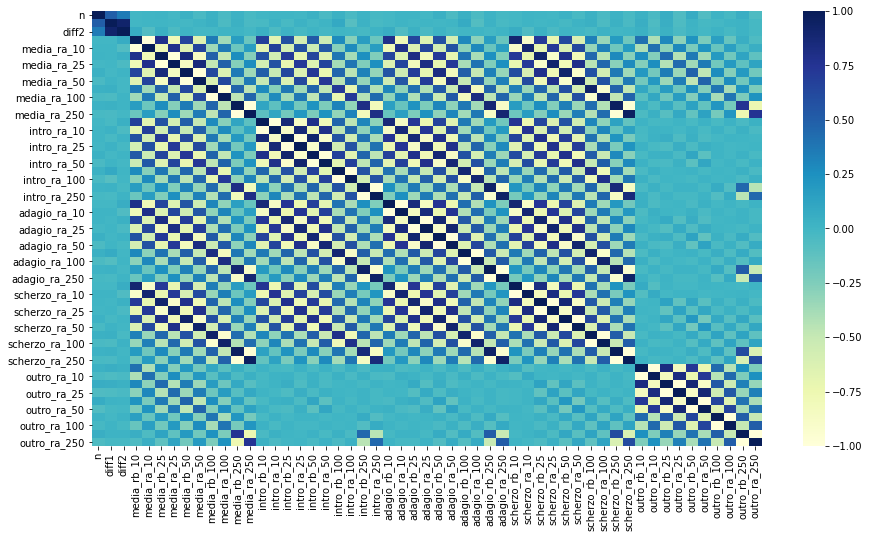

In [150]:
plt.figure(figsize=(15, 8))
# sns.heatmap(buy_perc.corr())
# sns.heatmap(ds.corr())
sns.heatmap(ds.corr(), cmap="YlGnBu")
### https://seaborn.pydata.org/generated/seaborn.heatmap.html
### https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c